## SRPT vs. BASRPT

In [17]:
import trafpy
import trafpy.generator as tpg

import os
import pickle
import matplotlib.pyplot as plt

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf50_1s_university_testbed_data_v2.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [18]:
envs = tb_dict['envs']
print(envs)

[<trafpy.manager.src.simulators.dcn.DCN object at 0x7f8abe5f5e50>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8aaa53ec70>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a9da8d7f0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a7d81ea00>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a7948b520>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a96f8c970>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8aab7c4370>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8ab353aaf0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8aa1b138e0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a8f6f7ca0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8ab5333160>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a9fb8c5e0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a9f3cb910>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a997bf2b0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f8a6c0247f0>, <trafpy.m

## TODO

### Key Stats to Compare
- Average flow completion time
- 99th percentile flow completion time
- Queue length
- Throughput

### Key Plots

In [19]:
for env in envs:
    print('Net capacity: {}'.format(env.network.graph['max_nw_capacity']))
    print(env.get_scheduling_session_summary(print_summary=True))

Net capacity: 12
-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_0.1_repeat_0_scheduler_basrpt'
Total session duration: 8396000.0 time units
Total number of generated demands (jobs or flows): 3000
Total info arrived: 9692671.0 info units
Load: 1.162527826431793 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 9692671.0 info units
Throughput: 1.1544391376846117 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 3000
Time first flow arrived: 0.0 time units
Time last flow arrived: 8337581.9310495285 time units
Time first flow completed: 3000.0 time units
Time last flow completed: 8396000.0 time units
Total number of demands that arrived and became flows: 3000
Total number of flows that were completed: 3000
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 7301

-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_0.9_repeat_0_scheduler_srpt'
Total session duration: 15805000.0 time units
Total number of generated demands (jobs or flows): 12000
Total info arrived: 38257272.0 info units
Load: 10.723764189172792 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 38257272.0 info units
Throughput: 2.4205803226826954 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 12000
Time first flow arrived: 0.0 time units
Time last flow arrived: 3567522.683744418 time units
Time first flow completed: 2000.0 time units
Time last flow completed: 15805000.0 time units
Total number of demands that arrived and became flows: 12000
Total number of flows that were completed: 12000
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 2279240.6618047

In [20]:
# collect testbed stats into dict
testbed_stats = {'test_{}'.format(i): 
                 {envs[i].scheduler.scheduler_name: 
                  {'load_rate': envs[i].load, 
                   'load_frac': envs[i].load/envs[i].network.graph['max_nw_capacity'],
                   'avrg_fct': envs[i].avrg_fct,
                   'nn_fct': envs[i].nn_fct,
                   'q_dict': envs[i].queue_evolution_dict,
                   'throughput': envs[i].throughput}
                 } for i in range(len(envs))}

# find classes
classes = []
for test in testbed_stats.keys():
    for _class in testbed_stats[test].keys():
        if _class not in classes:
            classes.append(_class)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


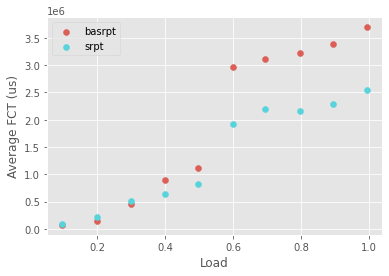

In [21]:
# avrg fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['load_frac'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['avrg_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='Load', ylabel='Average FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


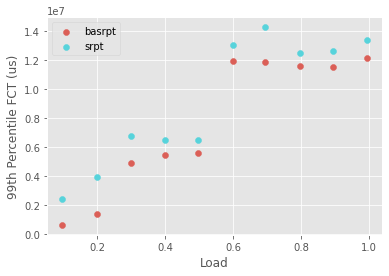

In [22]:
# 99th percentile fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['load_frac'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['nn_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='Load', ylabel='99th Percentile FCT (us)', show_fig=True)

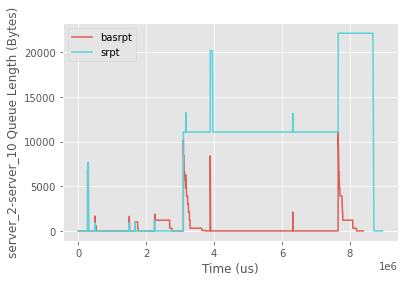

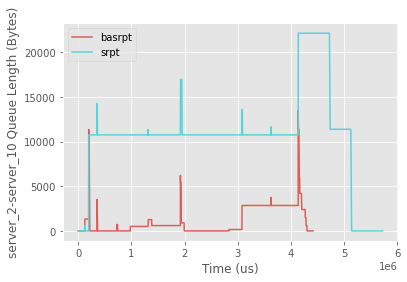

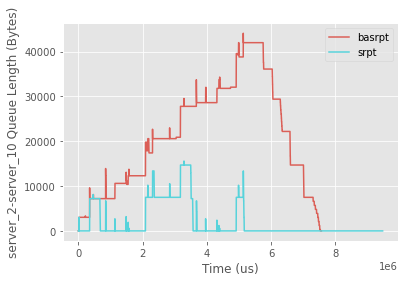

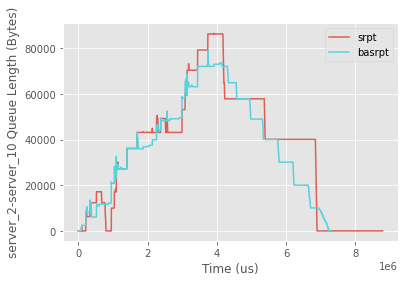

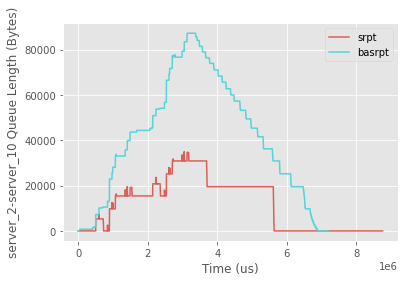

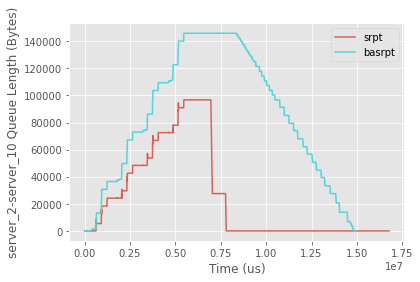

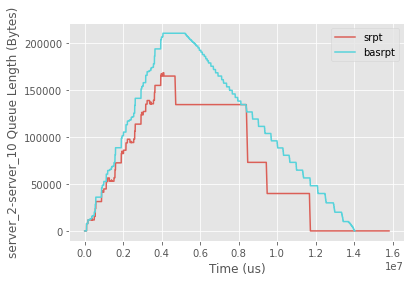

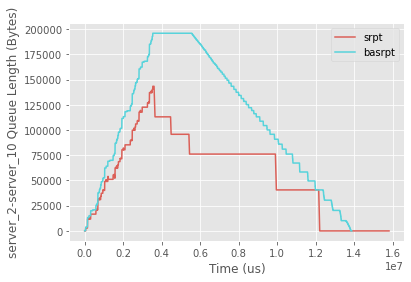

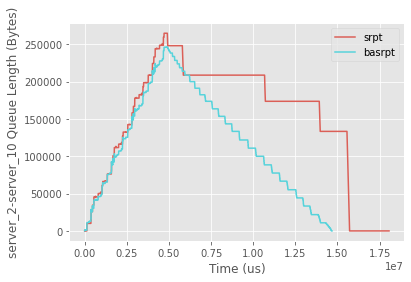

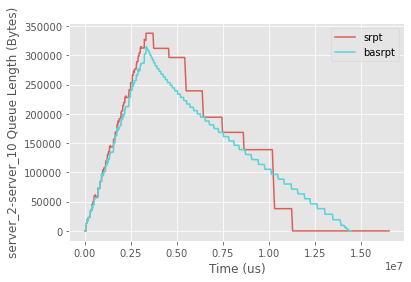

In [23]:
import numpy

# queue length
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load][_class]['x_values'] = None
        plot_dict[load][_class]['y_values'] = None
    except KeyError:
        # not yet added this load
        try:
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None

src = 'server_2'
dst='server_10'
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    plot_dict[load][_class]['x_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['times'] 
    plot_dict[load][_class]['y_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['queue_lengths']
    
for load in plot_dict.keys():
    tpg.plot_val_line(plot_dict=plot_dict[load],xlabel='Time (us)', ylabel='{}-{} Queue Length (Bytes)'.format(src,dst), show_fig=True)

{0.0968773188693161: {'x_values': ['b', 's'], 'y_values': [1.1544391376846117, 1.081529904039277]}, 0.1997221951733649: {'x_values': ['b', 's'], 'y_values': [2.3001175537938843, 1.7741123340321454]}, 0.2979311549178824: {'x_values': ['b', 's'], 'y_values': [2.6692249966970536, 2.1318311702015404]}, 0.39946802129924747: {'x_values': ['s', 'b'], 'y_values': [2.227603687684953, 2.691751616008802]}, 0.49612778818094366: {'x_values': ['s', 'b'], 'y_values': [2.227962992575671, 2.7144191483440023]}, 0.5989870817164099: {'x_values': ['s', 'b'], 'y_values': [2.4154043416030535, 2.708586905637665]}, 0.7967301573194346: {'x_values': ['s', 'b'], 'y_values': [2.4781262811590534, 2.79142417331813]}, 0.8936470157643993: {'x_values': ['s', 'b'], 'y_values': [2.4205803226826954, 2.7582748377793798]}, 0.6940330039348214: {'x_values': ['s', 'b'], 'y_values': [2.2375594684385383, 2.7534971381847915]}, 0.9930835061643405: {'x_values': ['s', 'b'], 'y_values': [2.409801127067806, 2.7493223643276874]}}


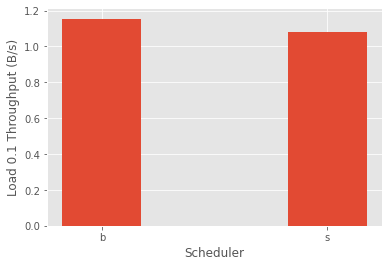

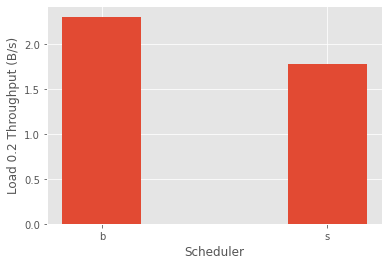

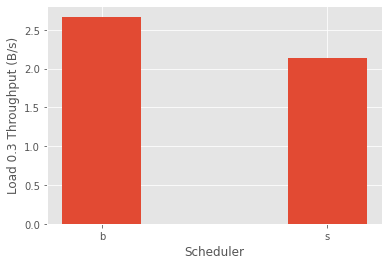

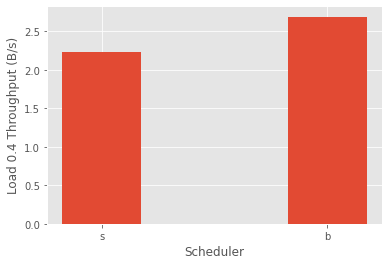

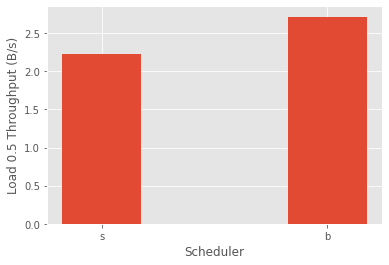

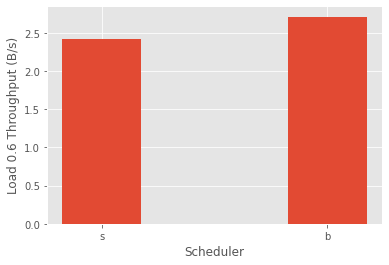

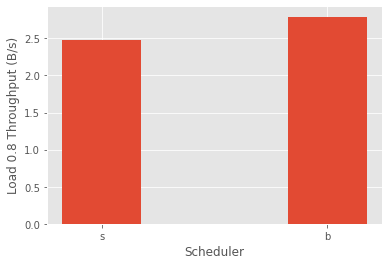

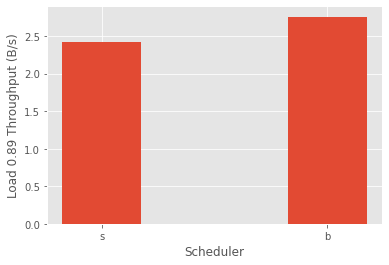

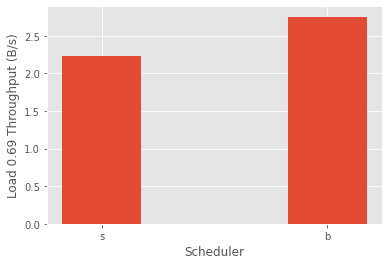

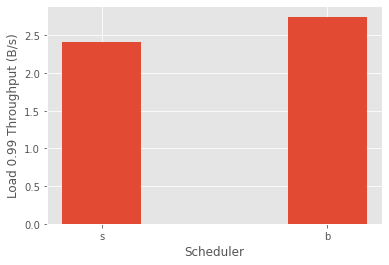

In [24]:
# throughput
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load]['x_values'].append(_class[0])
        plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
    except KeyError:
        try:
            plot_dict[load] = {}
            plot_dict[load]['x_values'].append(_class[0])
            plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load]['x_values'] = []
            plot_dict[load]['y_values'] = []
            plot_dict[load]['x_values'].append(_class[0])
            plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
    
print(plot_dict)
for load in plot_dict.keys():
    tpg.plot_val_bar(x_values=plot_dict[load]['x_values'],y_values=plot_dict[load]['y_values'],xlabel='Scheduler', ylabel='Load {} Throughput (B/s)'.format(str(round(load,2))), show_fig=True)

## Tuning BASRPT

In [11]:
import trafpy
import trafpy.generator as tpg

import os
import pickle
import matplotlib.pyplot as plt

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf10_university_testbed_data_basrpt_tuning.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())




dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [12]:
envs = tb_dict['envs']
print(envs)

[<trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319d6c8b0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319c87070>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319a56c10>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7316e41af0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7316b9c1c0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f730f3d6c10>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f730f1b7490>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7312e392e0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7312b9eee0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7303bd9610>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73039b16a0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73037113d0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7300c18700>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73009f96d0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72f6b99340>, <trafpy.m

## TODO

### Key Stats to Compare
- Throughput vs. V
- Average FCT vs. V
- 99th Percentile vs. V
- Queue Evolution (V composite)

### Key Plots

In [14]:
for env in envs:
    print('Net capacity: {}'.format(env.network.graph['max_nw_capacity']))
    print(env.get_scheduling_session_summary(print_summary=True))

Net capacity: 117.0
-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_1.0_repeat_0_scheduler_V200_basrpt'
Total session duration: 966000.0 time units
Total number of generated demands (jobs or flows): 600
Total info arrived: 1850619.0 info units
Load: 115.06229053275509 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 1850619.0 info units
Throughput: 1.915754658385093 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 600
Time first flow arrived: 0.0 time units
Time last flow arrived: 16083.627324220348 time units
Time first flow completed: 1000.0 time units
Time last flow completed: 966000.0 time units
Total number of demands that arrived and became flows: 600
Total number of flows that were completed: 600
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 22

-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_V50_basrpt'
Total session duration: 1092000.0 time units
Total number of generated demands (jobs or flows): 600
Total info arrived: 1941749.0 info units
Load: 56.0924082346491 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 1941749.0 info units
Throughput: 1.778158424908425 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 600
Time first flow arrived: 0.0 time units
Time last flow arrived: 34616.96620115079 time units
Time first flow completed: 1000.0 time units
Time last flow completed: 1092000.0 time units
Total number of demands that arrived and became flows: 600
Total number of flows that were completed: 600
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 245868.89979710002 time 

In [16]:
# collect testbed stats into dict
testbed_stats = {'test_{}'.format(i): 
                 {envs[i].scheduler.scheduler_name: 
                  {'load_rate': envs[i].load, 
                   'load_frac': envs[i].load/envs[i].network.graph['max_nw_capacity'],
                   'avrg_fct': envs[i].avrg_fct,
                   'nn_fct': envs[i].nn_fct,
                   'q_dict': envs[i].queue_evolution_dict,
                   'throughput': envs[i].throughput,
                   'V': envs[i].scheduler.V}
                 } for i in range(len(envs))}

# find classes
classes = []
for test in testbed_stats.keys():
    for _class in testbed_stats[test].keys():
        if _class not in classes:
            classes.append(_class)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

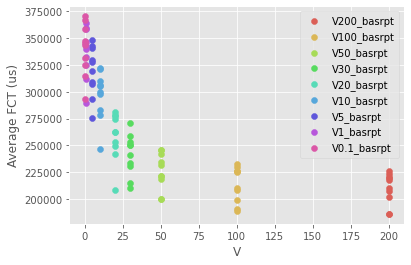

In [17]:
# avrg fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['avrg_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='Average FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

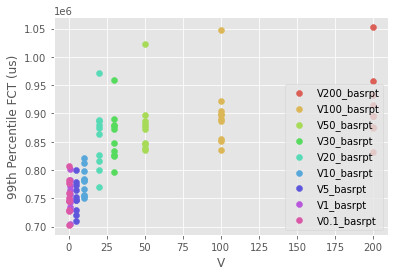

In [18]:
# 99th percentile fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['nn_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='99th Percentile FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

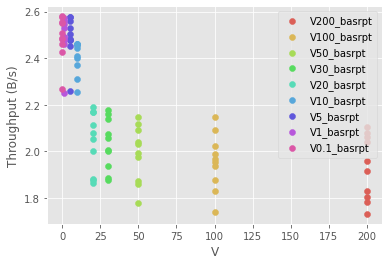

In [19]:
# throughput
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['throughput'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='Throughput (B/s)', show_fig=True)

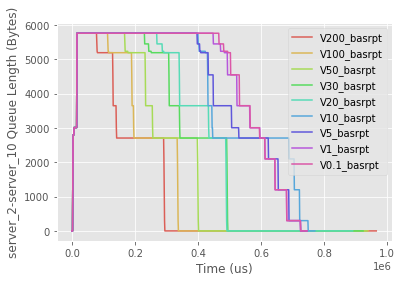

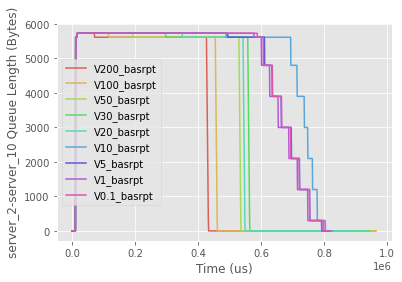

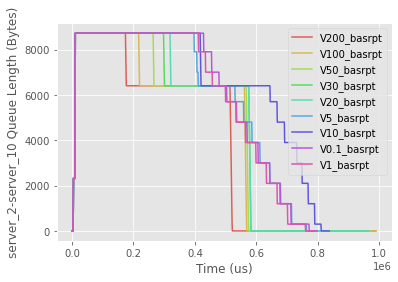

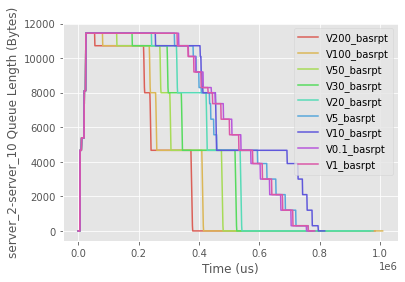

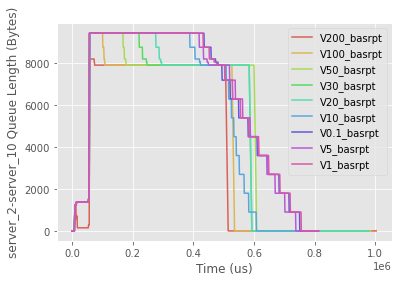

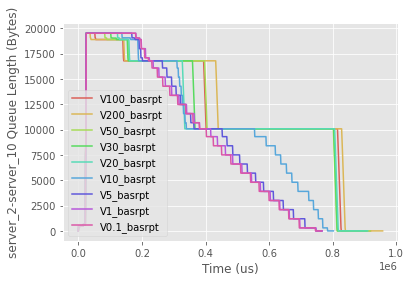

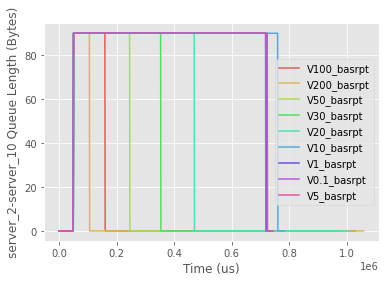

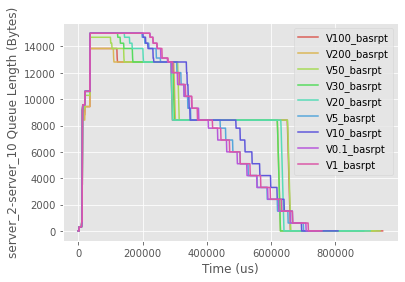

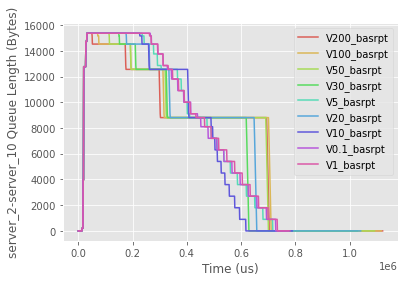

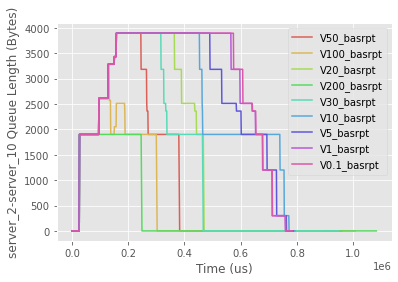

In [20]:
import numpy

# queue length
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load][_class]['x_values'] = None
        plot_dict[load][_class]['y_values'] = None
    except KeyError:
        # not yet added this load
        try:
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None

src = 'server_2'
dst='server_10'
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    plot_dict[load][_class]['x_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['times'] 
    plot_dict[load][_class]['y_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['queue_lengths']
    
for load in plot_dict.keys():
    tpg.plot_val_line(plot_dict=plot_dict[load],xlabel='Time (us)', ylabel='{}-{} Queue Length (Bytes)'.format(src,dst), show_fig=True)